In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data =  pd.read_csv('/kaggle/input/microsoft-lifetime-stocks-dataset/MSFT.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8525 non-null   object 
 1   Open       8525 non-null   float64
 2   High       8525 non-null   float64
 3   Low        8525 non-null   float64
 4   Close      8525 non-null   float64
 5   Adj Close  8525 non-null   float64
 6   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 466.3+ KB


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

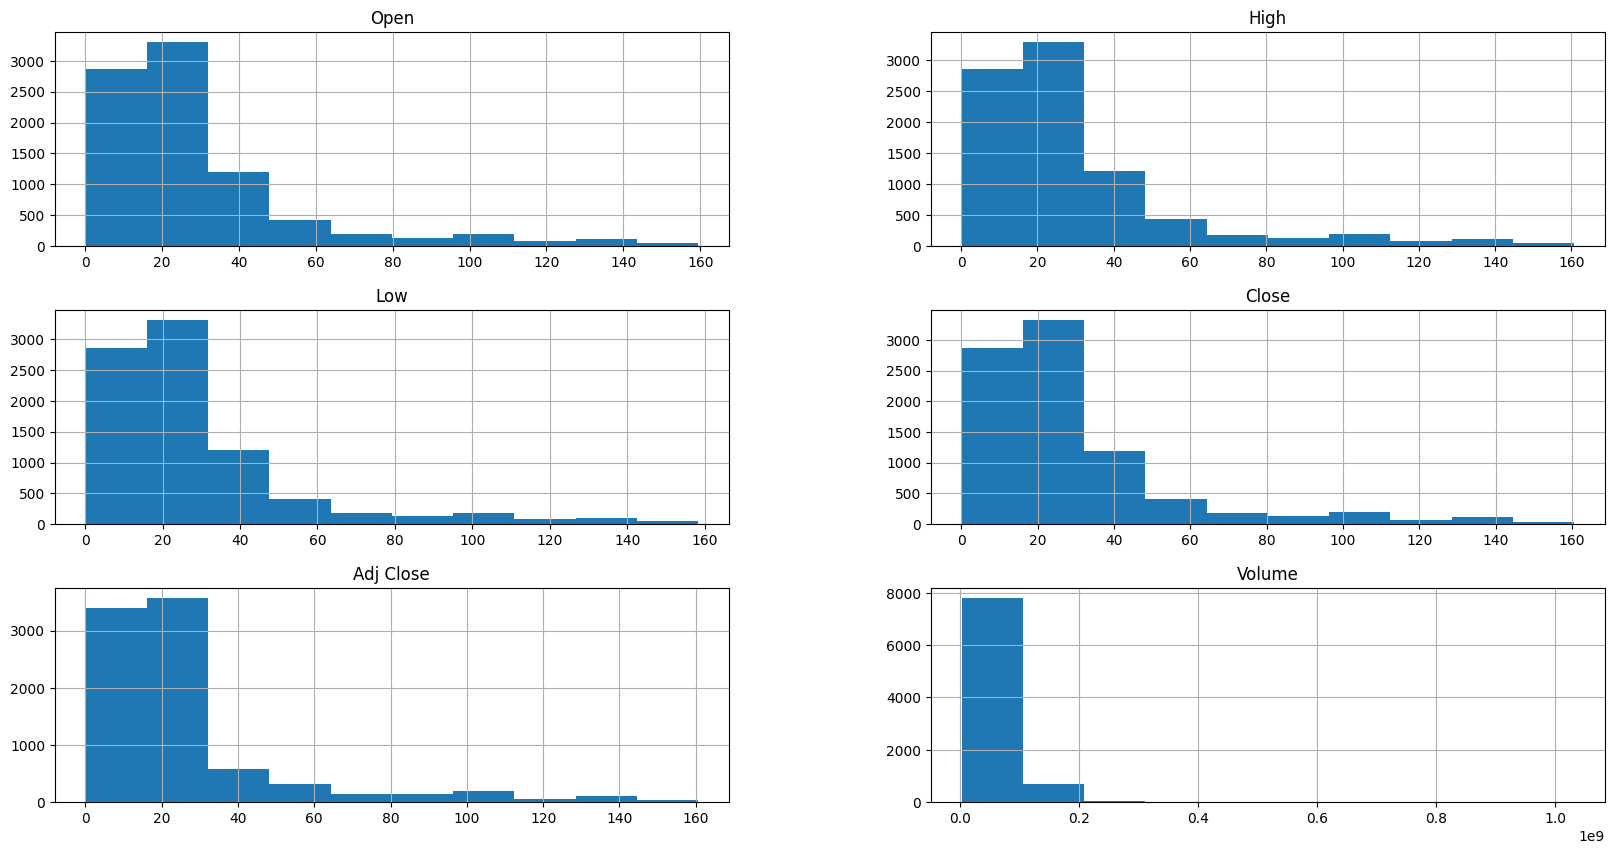

In [4]:
data.hist(figsize =(20,10) )

<Axes: >

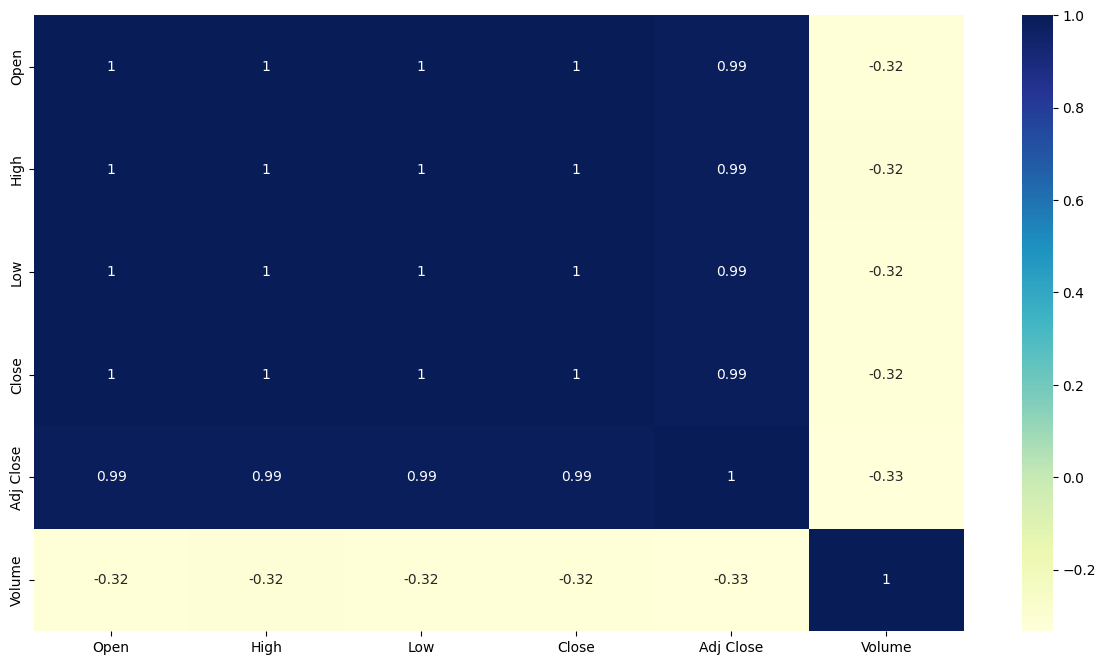

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(['Date'],axis=1).corr(),annot = True, cmap='YlGnBu')

In [6]:
train_data = data.iloc[:,5:6].values

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
train_data = scaler.fit_transform(train_data)
train_data.shape

(8525, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,8525):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    

X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(8465, 60, 1)

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

In [11]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae','mse'])

In [14]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
186/186 - 14s - loss: 0.0018 - mae: 0.0207 - mse: 0.0018 - val_loss: 0.0011 - val_mae: 0.0220 - val_mse: 0.0011 - 14s/epoch - 73ms/step
Epoch 2/100
186/186 - 3s - loss: 6.2179e-04 - mae: 0.0155 - mse: 6.2179e-04 - val_loss: 1.1631e-04 - val_mae: 0.0065 - val_mse: 1.1631e-04 - 3s/epoch - 18ms/step
Epoch 3/100
186/186 - 3s - loss: 5.3495e-04 - mae: 0.0136 - mse: 5.3495e-04 - val_loss: 1.9151e-04 - val_mae: 0.0077 - val_mse: 1.9151e-04 - 3s/epoch - 18ms/step
Epoch 4/100
186/186 - 3s - loss: 4.2033e-04 - mae: 0.0124 - mse: 4.2033e-04 - val_loss: 2.3153e-04 - val_mae: 0.0108 - val_mse: 2.3153e-04 - 3s/epoch - 16ms/step
Epoch 5/100
186/186 - 3s - loss: 4.0252e-04 - mae: 0.0124 - mse: 4.0252e-04 - val_loss: 1.3146e-04 - val_mae: 0.0076 - val_mse: 1.3146e-04 - 3s/epoch - 18ms/step
Epoch 6/100
186/186 - 3s - loss: 4.1959e-04 - mae: 0.0124 - mse: 4.1959e-04 - val_loss: 2.2659e-04 - val_mae: 0.0109 - val_mse: 2.2659e-04 - 3s/epoch - 16ms/step
Epoch 7/100
186/186 - 3s - loss: 3.8696e-0

<function matplotlib.pyplot.show(close=None, block=None)>

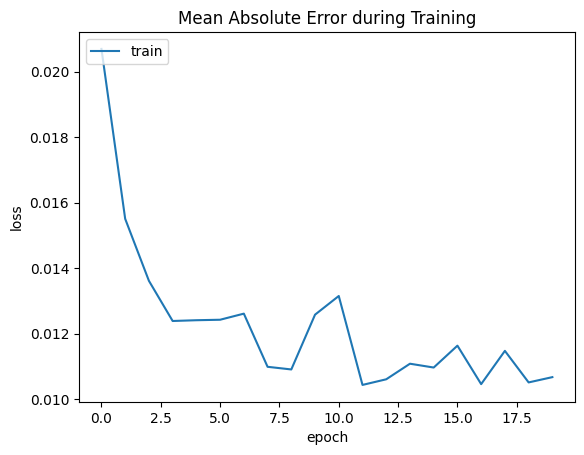

In [15]:
plt.plot(hist.history['mae'])
plt.title('Mean Absolute Error during Training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

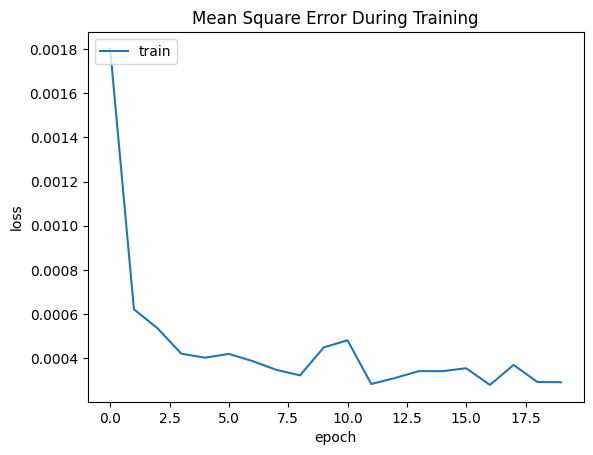

In [16]:
plt.plot(hist.history['mse'])
plt.title('Mean Square Error During Training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc = 'upper left')
plt.show

In [17]:
y_pred = model.predict(X_test)

27/27 [==============================] - 1s 7ms/step


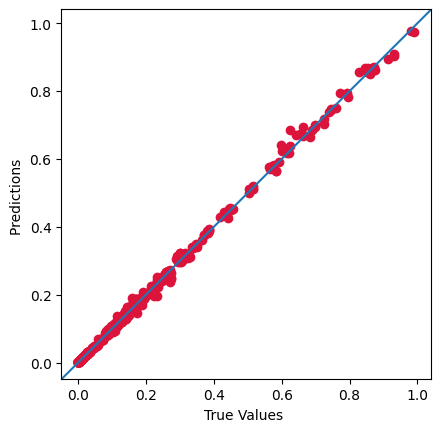

In [18]:
plt.scatter(y_test, y_pred,c='crimson')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])

In [19]:
model.save('/kaggle/working/output/LSTM_model.h5')